# Exercise 1 - CHF EUR USD Bonds

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [22]:
df = pd.read_csv('CRM_3_1.csv')
df.drop(df.columns[len(df.columns)-1],axis = 1,inplace = True)
df.loc[:,df.columns != 'Date'] = df.loc[:,df.columns != 'Date'].divide(100)

# Question 1 

In [23]:
Y = df.loc[df.index == len(df) - 1 , df.columns[1:(len(df.columns)-2)]]
alpha = [0.01 , 0.1 , 1]
T = [2 , 3 , 4 , 5 , 7 , 10 , 20 , 30]

In [24]:
gamma = pd.DataFrame(columns = T , index = T)
for i in range(len(T)):
    for j in range(len(T)):
        gamma.at[T[i],T[j]] = T[i]*T[j] * (1 + min(T[i],T[j])) - (T[i] + T[j])/2 * min(T[i],T[j]) **2 + min(T[i],T[j]) **3 / 3

In [25]:
def Big_Mat(Mat,alpha,T):
    Mat = np.array(Mat)
    n = len(Mat)
    In = np.identity(n)
    Mat = pd.DataFrame(Mat*alpha + In,columns = T , index = T)
    Mat.insert(0,'0', np.array(T) * alpha)
    T.insert(0,0)
    Mat.loc[0] = T
    Mat.sort_index(inplace = True)
    return Mat

In [26]:
T2 = [0 , 2 , 3 , 4 , 5 , 7 , 10 , 20 , 30]
Beta = pd.DataFrame(index = T2,columns = alpha)
Y = Y.values.tolist()[0]
Y.insert(0,0)
Y = np.array(Y)
for i in range(len(alpha)):
    Mat = Big_Mat(gamma,alpha[i],T)
    Vec = alpha[i] * np.array(T) * Y
    T = [2 , 3 , 4 , 5 , 7 , 10 , 20 , 30]
    Beta.loc[:,alpha[i]] = np.linalg.solve(np.array(Mat,dtype = 'float'), Vec)

In [27]:
Beta

,0.01,0.1,1.0
0,-0.004737,-0.007582,-0.008369
2,-0.000069,-0.000162,-0.000191
3,-0.000095,-0.000217,-0.000304
4,-0.000108,-0.000229,-0.000285
5,-0.000111,-0.000208,-0.000223
7,-0.000088,-0.000101,-0.000107
10,-0.000018,0.000122,0.000219
20,0.000102,0.000155,0.000138
30,0.000005,-0.000023,-0.000022


In [28]:
def fun(u,Beta,T):
    Beta = Beta.tolist()
    y = Beta[0]
    for i in range(len(T)):
        if u <= T[i]:
            y = y + Beta[i+1]/u * (T[i]*u + T[i]*u**2/2 - u**3/6)
        else:
            y = y + Beta[i+1]/u * (T[i]**2 *u /2- T[i]**3/6 + T[i]*u)
    return y
def forward(u,Beta,T):
    Beta = Beta.tolist()
    y = Beta[0]
    for i in range(len(T)):
        if T[i] <= u:
            y = y + Beta[i+1] * (T[i] + T[i]**2/2)
        else:
            y = y + Beta[i+1] * (T[i] *u - u**2/2 + T[i])
    return y

In [29]:
u = np.arange(0.01,30,0.01)
res_u = pd.DataFrame(index = u, columns = alpha)

for i in range(len(alpha)):
    for j in range(len(u)):
        res_u.loc[u[j],alpha[i]] = fun(u[j] ,Beta.loc[:,alpha[i]],T)

In [30]:
np.delete(Y,0)
P = np.zeros(len(T))
fwd = np.zeros(len(T))
for i in range(len(T)):
    P[i] = np.exp(-T[i]*Y[i])
for i in range(len(T)):
    if i == 0:
        fwd[i] = 1/T[i] * (1/P[i] - 1)
    else:
        fwd[i] = 1/T[i] * (P[i-1]/P[i] - 1)

Text(0, 0.5, 'Instantaneous forward')

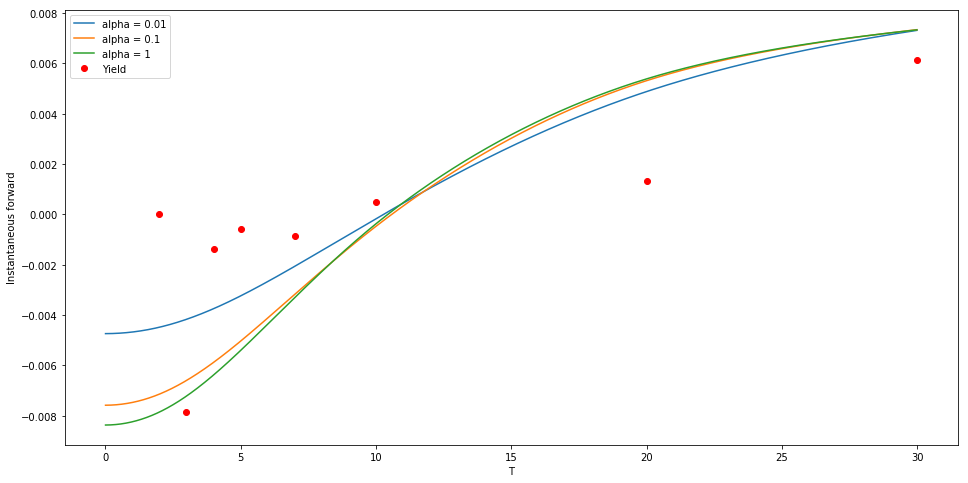

In [31]:
plt.figure(figsize = (16,8))
plt.plot(res_u.loc[:,alpha[0]],label = 'alpha = 0.01')
plt.plot(res_u.loc[:,alpha[1]],label = 'alpha = 0.1')
plt.plot(res_u.loc[:,alpha[2]],label = 'alpha = 1')
plt.plot(T,fwd,'ro',label = 'Yield')
plt.legend()
plt.xlabel('T')
plt.ylabel('Instantaneous forward')

# Question 1.2

In [32]:
df2 = df.loc[(len(df.index) - 12 * 10):(len(df.index) - 1),  df.columns[1:(len(df.columns)-2)]].multiply(100)
df2.tail()

,CHF2Y,CHF3Y,CHF4Y,CHF5Y,CHF7Y,CHF10Y,CHF20Y,CHF30Y
326,-0.795086,-0.730781,-0.608544,-0.474612,-0.239645,-0.000708,0.318946,0.427777
327,-0.773802,-0.666691,-0.541914,-0.417258,-0.197545,0.039750,0.376872,0.491052
328,-0.811357,-0.736037,-0.635740,-0.525107,-0.305667,-0.030877,0.421656,0.571305
329,-0.878847,-0.788783,-0.663124,-0.522708,-0.243878,0.100539,0.636724,0.797054
330,-0.794860,-0.732032,-0.645307,-0.545175,-0.332144,-0.035333,0.539176,0.733404


In [33]:
df2 = df2 - df2.shift(1)
df2.dropna(inplace = True)

In [34]:
df2_mean = np.array(df2 - df2.mean())
VarCovar = np.matmul(df2_mean.T,df2_mean) / len(df2)
VarCovar

array([[ 0.02317637,  0.02297935,  0.02040998,  0.01784983,  0.01443562,
         0.01211294,  0.00946012,  0.00764974],
       [ 0.02297935,  0.0255028 ,  0.02398933,  0.02163776,  0.0179231 ,
         0.01509683,  0.01171852,  0.00947727],
       [ 0.02040998,  0.02398933,  0.02393541,  0.02271143,  0.02015362,
         0.01771769,  0.01419209,  0.01205556],
       [ 0.01784983,  0.02163776,  0.02271143,  0.02258215,  0.02138462,
         0.01963268,  0.01630695,  0.0144043 ],
       [ 0.01443562,  0.0179231 ,  0.02015362,  0.02138462,  0.022187  ,
         0.02180873,  0.01937647,  0.01773981],
       [ 0.01211294,  0.01509683,  0.01771769,  0.01963268,  0.02180873,
         0.02290715,  0.02210037,  0.02040246],
       [ 0.00946012,  0.01171852,  0.01419209,  0.01630695,  0.01937647,
         0.02210037,  0.02480016,  0.02397965],
       [ 0.00764974,  0.00947727,  0.01205556,  0.0144043 ,  0.01773981,
         0.02040246,  0.02397965,  0.02562649]])

In [35]:
eigenvec = np.linalg.eig(np.array(VarCovar))[1]
eigenval = np.linalg.eig(np.array(VarCovar))[0]

In [36]:
Y = np.matmul(eigenvec,np.array(df2_mean).T)

In [37]:
print ('The first 3 pricipal components are, i.e. the ones corresponding to the eigenvalues',eigenval[0],eigenval[1],eigenval[2])
print ('They explain',(eigenval[0]+eigenval[1]+eigenval[2])/np.sum(eigenval))

The first 3 pricipal components are, i.e. the ones corresponding to the eigenvalues 0.146793761724 0.0350701450131 0.0061939296407
They explain 0.986054325054


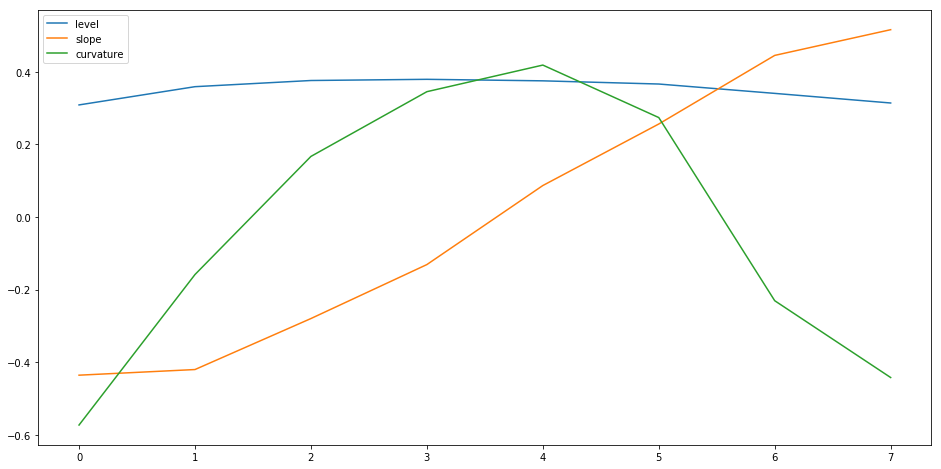

In [38]:
plt.figure(figsize = (16,8))
plt.plot(-eigenvec.T[0],label = ('level'))
plt.plot(-eigenvec.T[1],label = ('slope'))
plt.plot(-eigenvec.T[2],label = ('curvature'))
plt.legend()